

# <center> HW2 - Linear Discriminant Analysis, Perception Classification <center>

## LDA Multiclassification

In [471]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
#maybe make dataframe and get data description.

X, y, centers = datasets.make_blobs(n_samples = 400, n_features = 4,
    centers=4, cluster_std = 2, random_state=100, return_centers=True)

As we can see above, each array represents one of our blobs and each column represents a feature and its center

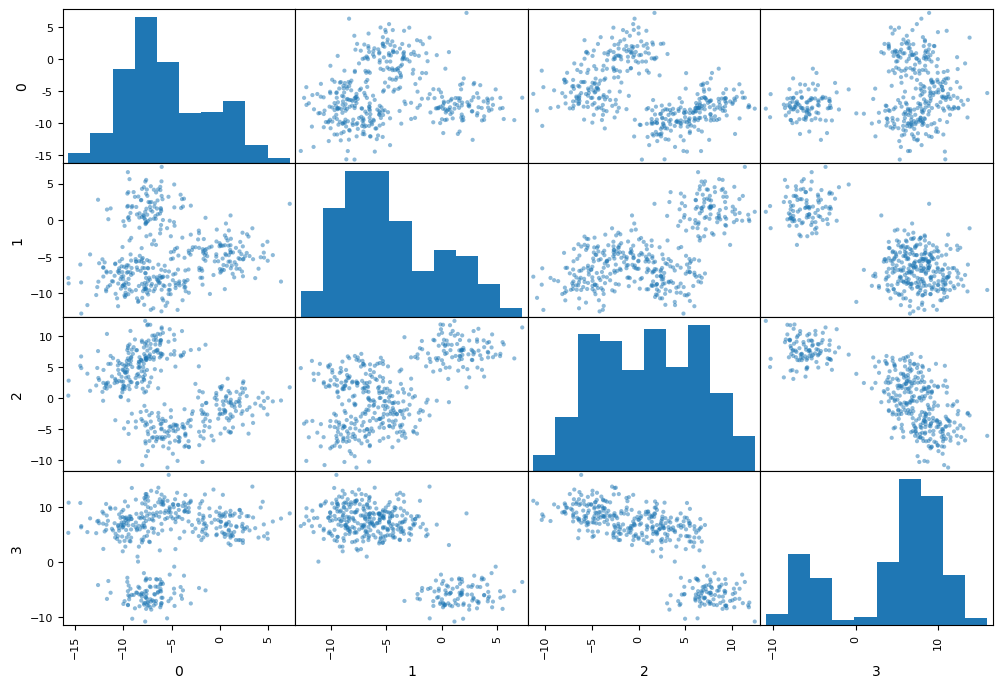

In [472]:

DF = pd.DataFrame.from_records(X)

from pandas.plotting import scatter_matrix


scatter_matrix(DF, figsize=(12,8))
plt.show()


While we can get a general understanding for the entire dataset from the above scatter matrix, it will be much more useful to visualize data as we get further in the process of LDA. At that point, we can get a general understanding for the entire dataset from reduced dimensions and from a much better perspective. It is important to note that although the above scatter matrix does distinguish based on plotting in the 2-dimensions (i.e using 2 columns, like column 1: column 3 in the positions (1,3) and (3, 1)), there are still 400 points, 100 from each class, within each plot. Primarily, dimensional reduction is necessary to make this problem simpler. 

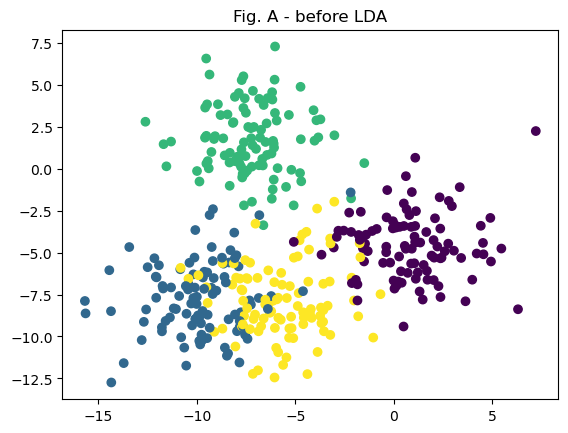

In [473]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)
plt.title("Fig. A - before LDA")
plt.show()

# len(X[:, 0]) + len(X[:,1])

Though the above graphic does not represent the 4-dimensions that our data is in, it does effectively show that our 4 clusters are centered in their own position and gives us the opportunity to project points into a new 2-dimensional space using knowledge of the within class and between class scatter metrics (matrix) in order to make points of the same class closer together and those of different classes further apart in order to employ our decision-making criterion.

a. [20 pts] Modify the within-class (Sw) and between-class (SB) functions in the lecture
 note to calculate the scatter matrices.

In [474]:
import numpy as np

mean_vectors = []
for cl in range(0,4):
    mean_vectors.append(np.mean(X[y==cl], axis = 0))  # get the maen vectors for each class
    Overall_Mean = np.mean(X, axis = 0)  # get the weighted mean...


mean_vectors

for i, lab in zip(range(0,4), ['Class 1: ', 'Class 2: ', 'Class 3: ', 'Class 4: ']):
    print(lab + str(mean_vectors[i]))

Overall_Mean

Class 1: [ 0.82744825 -4.59819208 -1.45809237  6.99189147]
Class 2: [-9.87038197 -7.71058888  3.46678297  6.29065458]
Class 3: [-7.22645471  1.66250747  7.72800594 -5.9162825 ]
Class 4: [-5.69657185 -7.85882945 -5.54778158  9.74113663]


array([-5.49149007, -4.62627573,  1.04722874,  4.27685005])

Above we calculated the mean vectors for each of the 4 blobs (clusters). We can now find the mean separation vector by adding the mean vectors for each feature.

In [475]:
#change mean_sep to "weighed mean" calculation when calculating SB.
# we dont / cant use mean separation calculations for multiclassification


mean_sep = [] # my values have more precision if this ever becomes an issue (it never will)
for i in range(0,4):
    mean_sep.append((mean_vectors[0][i]+mean_vectors[1][i]+mean_vectors[2][i]+mean_vectors[3][i])/4)

print("Mean separation b/w all vectors: " + str(mean_sep))

Mean separation b/w all vectors: [-5.491490070270536, -4.626275734695496, 1.0472287394602937, 4.276850046357971]


In [476]:
SW = np.zeros((4,4))
for cl, mv in zip(range(0,4),mean_vectors):
    class_sc_mat = np.zeros((4,4))
    for x_ in X[y==cl]:
        x_, mv = x_.reshape(4,1), mv.reshape(4,1) 
        class_sc_mat += (x_-mv).dot((x_-mv).T) # calculate Sw
    SW += class_sc_mat


print("Within-class scatter matrix:")
for i in range(0, 4):
    print(SW[i])

Within-class scatter matrix:
[1750.98152406  106.48932315  198.55647822 -169.76805166]
[ 106.48932315 1723.81488361   41.4319164   133.18995014]
[ 198.55647822   41.4319164  1636.0479396  -122.4631805 ]
[-169.76805166  133.18995014 -122.4631805  1638.32393169]


Above, we can see that Sw is a symmetric 4x4 matrix.

In [477]:
SB = np.zeros((4,4))
for cl, mean_vec in enumerate(mean_vectors):
    n = X[y==cl, :].shape[0] #number of columns in blob
    mean_vec = mean_vec.reshape(4,1)
    overall_mean = Overall_Mean.reshape(4,1)  #overall mean -> weighted mean...
    SB += n*(mean_vec-overall_mean).dot((mean_vec - overall_mean).T)  #calculate SB using 

print("Between-class scatter matrix:")
for i in range(0, 4):
    print(SB[i])

Between-class scatter matrix:
[ 6215.58365775   343.5454076  -3666.43317823  2490.20459148]
[  343.5454076   5951.19739909  5579.96630527 -8790.09561851]
[ -3666.43317823   5579.96630527  10025.78216681 -10606.46152794]
[  2490.20459148  -8790.09561851 -10606.46152794  14518.52376827]


We have also identified SB as a symmetric matrix, of very high (maximal) values as expected.

 b. [5 pts] Reduce the dimensions to 2-D by finding the eigenvalues, λ, and their corresponding
 eigenvectors using SB and Sw matrices found in a). Projectile points and visualize the result.

In [478]:
# find eigenvalues, eigenvectors
Sw_inv_SB = np.linalg.inv(SW).dot(SB)
eigenvalues, eigenvectors = np.linalg.eig(Sw_inv_SB) 
eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]

eigen_pairs = sorted(eigen_pairs, key = lambda k: k[0], reverse = True)

lambda1 = eigenvalues[0]
lambda2 = eigenvalues[1]

for i in eigen_pairs:
    print("Eigenvalue: " + str(i[0]) +"\n", "Corresponding eigenvector: " + str(i[1]) + "\n")

# given the eigenvalues, eigenvectors, we need to reduce to 2-dimensions using 2 eigenvectors. 

Eigenvalue: 18.329565866100403
 Corresponding eigenvector: [-0.31698395  0.41568254  0.50429659 -0.6873239 ]

Eigenvalue: 4.015495496672319
 Corresponding eigenvector: [ 0.80880986  0.42457667 -0.32741828 -0.24157511]

Eigenvalue: 0.7489231082280354
 Corresponding eigenvector: [-0.42438995  0.24315086 -0.78687792 -0.37628973]

Eigenvalue: 3.935718606899028e-16
 Corresponding eigenvector: [-0.2104599   0.77266688  0.11483868  0.5877964 ]



In [479]:
eigenvalues_sum = sum(eigenvalues)
for i, j in enumerate(eigen_pairs):
    print("Eigenvalue {0:}: {1: .2%}".format (i+1, (j[0]/eigenvalues_sum).real))

Eigenvalue 1:  79.37%
Eigenvalue 2:  17.39%
Eigenvalue 3:  3.24%
Eigenvalue 4:  0.00%


Note that our smallest value in the list of eigenvalues is very very small, and to the order of 10^(-16). We will choose our highest value eigenvalues (18.3296, 4.0155) to reduce the data from 4-dimensions for 2-D visualization, as the highest eigenvalue/vectors can ensure that the points (centers) of our blobs are as seperated as possible.

We will use the above weight vectors that correspond with our highest eigenvalues, 18.329565866100403, with [-0.31698395, 0.41568254, 0.50429659,-0.6873239], and 4.015495496672319 with [0.80880986, 0.42457667, -0.32741828, -0.24157511]. We will want to make this vector into a unit vector as well for classification purposes.

In [480]:
# using 2 eigenvalues...?

W = np.array([eigenvectors.T[0], eigenvectors.T[1]]) # r = 2, c = 4
W = W.T #r = 4, c = 2 (column eigenvectors to match the 4 features of our (size 400) data)
W

array([[-0.31698395,  0.80880986],
       [ 0.41568254,  0.42457667],
       [ 0.50429659, -0.32741828],
       [-0.6873239 , -0.24157511]])

In [481]:
def unit_vector(w):
    w_len = np.linalg.norm(w)
    return w/w_len  
# print(W)
W=unit_vector(W)
W

array([[-0.2241415 ,  0.57191493],
       [ 0.29393194,  0.30022105],
       [ 0.35659154, -0.23151968],
       [-0.48601139, -0.1708194 ]])

Given these eigenvalues and eigenvectors, we will make a matrix composed of the eigenvector columns found for the highest value eigenvalues. Consequently, the matrix of eigenvectors represents the weights (or correspondance) between features and clusters (class). 

Note below that X_p holds the projected data on the weight vectors we obtained through the k-2 dimensional reduction in choosing the two highest eigenvalues.

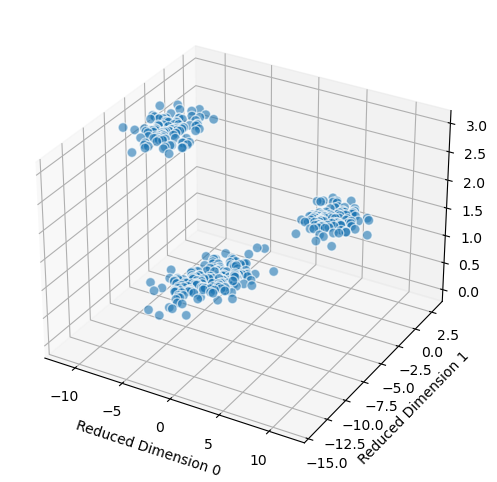

In [482]:
X_p = X.dot(W)  # matrix multiplication of data against observed weights ~ LDA
# X_p

DF_p = pd.DataFrame.from_records(X_p) # store data from the K-2 reduced dimension

"""
Very nice 3-D graphical implementation found from :
https://www.kaggle.com/code/shiyugong/what-s-cooking-eda-and-multi-class-classification
"""

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = DF_p[0]
ys = DF_p[1]
zs = y
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Reduced Dimension 0')
ax.set_ylabel('Reduced Dimension 1')
ax.set_zlabel('y')
plt.show()

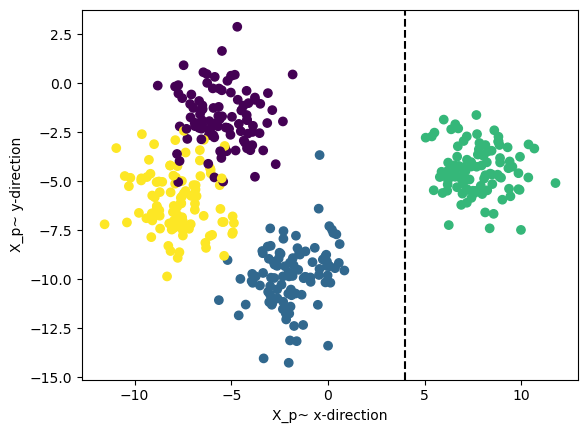

In [483]:
plt.scatter(X_p[:, 0], X_p[:, 1], marker="o", c=y)
plt.xlabel("X_p~ x-direction")
plt.ylabel("X_p~ y-direction")
plt.axvline(x=4, color='black', linestyle='--')
plt.show()

The scatter plots of our untouched data in Fig. A has defined classes, but with high variance / overlap and less pronounced (separation beween) centroids, we can't effectively classify. Seeing in Fig. B, we see that the cluster of green points has effectively been projected into its own region of the graph, completely distinct from the rest of the clusters. We could effectively classify the points in the green group as those greater than x=4 in the projeced data's X [or 0] direction.

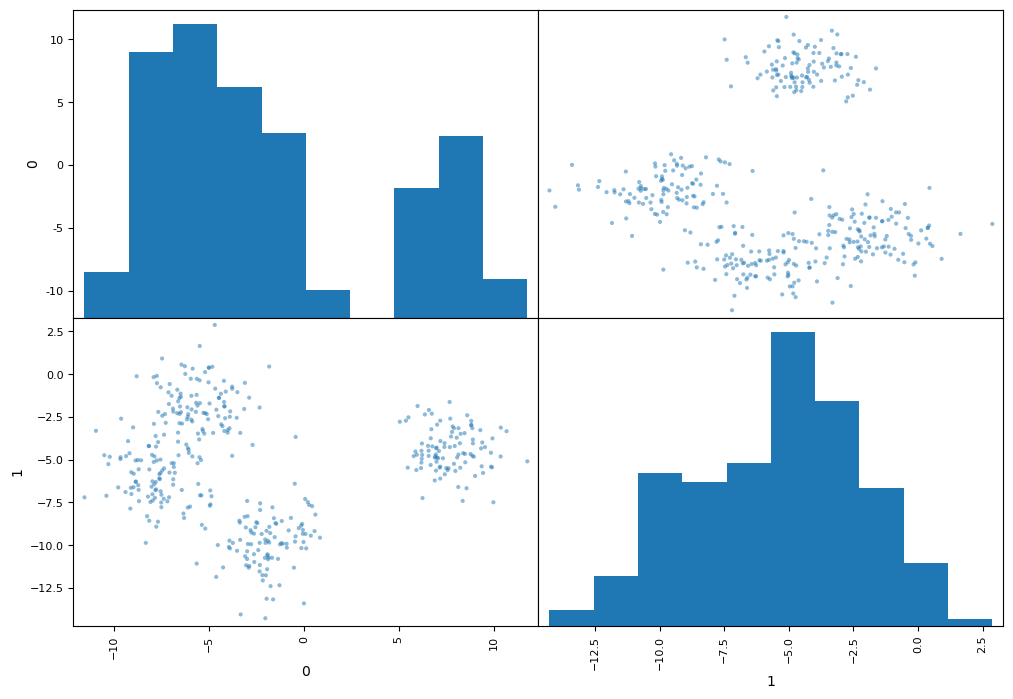

In [484]:
scatter_matrix(DF_p, figsize=(12,8))
plt.show()

# DF_p.describe()

Upon examining the above scatter matrix, we can see that we could also perform classification criterion on the blue group as well, as there does exist a line that would seperate this blue group from the other 3 upon close examination. It may be better to wait until we implement a new LDA model which should further define our groups to classify the blue groups.

 c. [10 pts] Within the reduced space, perform LDA with the provided implementation code to
 classify the target. Report the accuracy.

As suggested by the Professor, we now have a 2-dimensional problem but (should) still have 4 distinct classes. We can see this in the above scatter plot. We should find new weight vectors, but this time for the 2-D problem (400 points but 2 columns), in order to employ multi-classification. It can already be clear that in the projected data (X_p or DF_p) that we have successfully separated out the centroids, and made dots more compacted. Notably, we haven't lost any of our data but have transformed it for easier classification.

In [485]:
### mean vectors ####
### each class mean vector ###
# X=X_p # modified for implementation
mu0 = np.array([np.mean(X_p[y==0][:, 0]),np.mean(X_p[y==0][:, 1])]) ##y=0
mu1 = np.array([np.mean(X_p[y==1][:, 0]),np.mean(X_p[y==1][:, 1])]) ##y=1
print(f'mu0: {mu0}')
print(f'mu1: {mu1}')
### the mean seperator vector ###
mu_ = mu1 - mu0
#mu_ = mu_/np.linalg.norm(mu_)**2 ## unit vector of mu_
print(f'the mean separator is {mu_}')

mu0: [-5.45510334 -1.76401765]
mu1: [-1.87513045 -9.83709425]
the mean separator is [ 3.5799729 -8.0730766]


In [486]:
### With-in class covariance matrix calculation ###
### for each class ###
Sw0 = np.matmul((X_p[y==0]-mu0).T,(X_p[y==0]-mu0))
Sw1 = np.matmul((X_p[y==1]-mu1).T,(X_p[y==1]-mu1))
### Over-all ###
Sw=Sw0+Sw1
print(f'the within-class covariance is \n {Sw}\n')
### Inverse of Over-all ###
Sw_inv = np.linalg.inv(Sw)
print(f'the inverse within-class covariance is \n {Sw_inv}')

the within-class covariance is 
 [[386.34966166  42.90508578]
 [ 42.90508578 464.59192982]]

the inverse within-class covariance is 
 [[ 0.00261515 -0.00024151]
 [-0.00024151  0.00217473]]


In [487]:
### Prediction ###
n = len(X[:,0])
w=np.matmul(Sw_inv,mu_)
w

array([ 0.01131188, -0.01842136])

In [488]:
w=unit_vector(w)

In [489]:
Sb = np.matmul(mu_.reshape(2,1),mu_.reshape(2,1).T)
print("the between class covariance:\n {}".format(Sb))

the between class covariance:
 [[ 12.81620593 -28.90139542]
 [-28.90139542  65.17456583]]


In [490]:
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
# print(eigenvectors)

lambda_max = eigenvalues[1]   # lambda_max
eigenvector_max = eigenvectors[:,1]   # eigenvector_max
eigenvector_u = unit_vector(eigenvector_max)


for i in range(len(eigenvalues)):
    eigenvectors_sc = eigenvectors[:,i].reshape(2,1)
    print("Eigenvalue {:} : {:.2e}".format(i+1,eigenvalues[i].real))
    print("Eigenvectors {}: \n{}".format(i+1, eigenvectors_sc.real))

eigenvector_u # unit vector eigenvector_max

Eigenvalue 1 : 0.00e+00
Eigenvectors 1: 
[[-0.91415   ]
 [-0.40537609]]
Eigenvalue 2 : 1.89e-01
Eigenvectors 2: 
[[ 0.52328067]
 [-0.8521604 ]]


array([ 0.52328067, -0.8521604 ])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


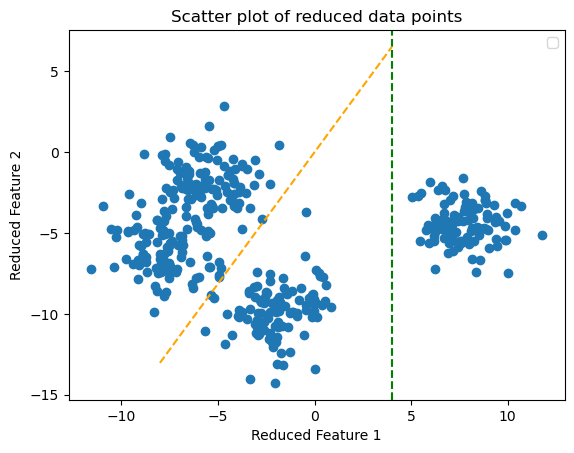

In [491]:
plt.scatter(X_p[:, 0], X_p[:, 1], marker="o")

plt.title('Scatter plot of reduced data points')

#NOTE: may want to use observed eigenvalue/vectors directly for precision
# X [400x4], w [4x2] (k=2, 2 highest lambda eigenvectors)
# Slope from LDA 1 
plt.axvline(x=4, color='green', linestyle='--')
plt.xlabel('Reduced Feature 1')
plt.ylabel('Reduced Feature 2')

#Slope from LDA 2 (binary LDA)
slope = 0.8521604/0.52328067
x_values = np.linspace(-8, 4, 100)
y_values = slope * x_values
plt.plot(x_values, y_values, color = 'orange', linestyle='--')

plt.legend()
plt.show()

In [492]:
# from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# X_p = X_p*eigenvector_u

lda = LinearDiscriminantAnalysis()
lda.fit(X_p,y)
ylda_hat = lda.predict(X_p)
w_lda = np.array([lda.intercept_[0], lda.coef_[0][0], lda.coef_[0][1]])
print(f'w_lda: {w_lda}')
wlda_hat = unit_vector(w_lda)
#wlda_hat = np.array([lda.intercept_[0]/np.sum(lda.coef_**2)**0.5, lda.coef_[0][0]/np.sum(lda.coef_**2)**0.5, lda.coef_[0][1]/np.sum(lda.coef_**2)**0.5])
print(f'unit vector of wlda: {wlda_hat}')
print(f'accuracy: {accuracy_score(y,ylda_hat)}')
print(lda.means_)

w_lda: [-1.92644842 -1.88118952  1.73837193]
unit vector of wlda: [-0.60107626 -0.58695491  0.54239402]
accuracy: 0.9725
[[-5.45510334 -1.76401765]
 [-1.87513045 -9.83709425]
 [ 7.7395347  -4.4123673 ]
 [-7.74571819 -5.996895  ]]


Upon getting the accuracy for our classifications, we can see that our model accurately classified 97.25% of our points. This means that we misclassified, or had a misclassification rate of 2.75% among all of the data points, composing 11 of our data points.

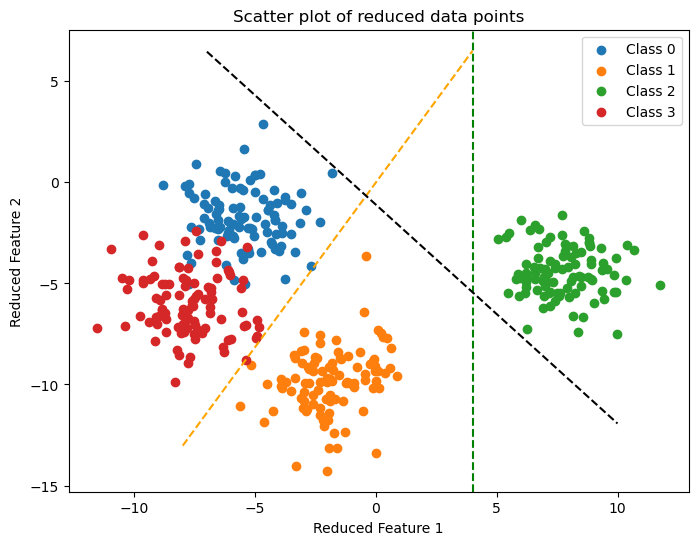

In [493]:
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    plt.scatter(X_p[y == i, 0], X_p[y == i, 1], label=f'Class {i}')

plt.title('Scatter plot of reduced data points')

#NOTE: may want to use observed eigenvalue/vectors directly for precision
# X [400x4], w [4x2] (k=2, 2 highest lambda eigenvectors)
# Slope from LDA 1 
plt.axvline(x=4, color='green', linestyle='--')
plt.xlabel('Reduced Feature 1')
plt.ylabel('Reduced Feature 2')

#Slope from LDA 2 (binary LDA)
slope = 0.8521604/0.52328067
x_values = np.linspace(-8, 4, 100)
y_values = slope * x_values
plt.plot(x_values, y_values, color = 'orange', linestyle='--')

#Slope from LDA 3 (scikitlearn.LinearDiscriminantAnalysis)
slope = (w_lda[1]/w_lda[2])
x_values = np.linspace(-7, 10, 100)
y_values = slope*x_values + (w_lda[0]/w_lda[2])
plt.plot(x_values, y_values, color = 'black', linestyle='--')

plt.legend()
plt.show()

I would like to note that our model has gone through three different means of linear discriminant analysis. This is a piece of good news, as we have confirmed the earlier fact that if we want to classify points into 4 different groups, clusters, we will need exactly (K-1) hyperplanes (based on set theory). Primarily, we were able to distinguish the green class (class 2) from the rest, as we can say if any observation [0,400] has an x-value greater than four (x~X[:,0]), it is easy to say that it is a green point (where our LinearDiscriminantAnalysis() function will observe the class distinctions (unless involving a severe computational bug) with full accuracy). This multiclass model LDA would use decision criterion to say that any point X[:,0] greater than four is a green point, and otherwise it is in another group (requiring further LDA). We can think of LDA multiclassification as multiple cases of binary LDA where we can seperate one group from another with each additional hyperplane.

We can keep employing this same logic to see how orange dots are separated from the other 2 classes (red and blue) which haven't gained classification criteria. Anything generally greater than (to the right of) this orange line will be classified as orange. We can see upon examination that exactly one red point has been misclassified by our model as orange. Based on LDA and its foundation of cluster seperation through the Mahalanobis distance, this means that when our model was ran on this (misclassified) red dot, it found the closest class mean amongst the reduced features as in the orange group. Furthermore, we can see how final projection upon an orthogonal position to the black dotted line will be able to put the final classification into 1-dimension (exactly as done prior). We could numerically understand that exactly 10 of the {red, blue} dots were misclassified which is reasonable given the above visualization.

d. [5 pts] Perform scikit-learn LDA to classify the target in the original space by using the
 original data). Compare the results from c).

In [494]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.metrics import accuracy_score
lda = LinearDiscriminantAnalysis()

lda.fit(X,y)
ylda_hat = lda.predict(X)
w_lda = np.array([lda.intercept_[0], lda.coef_[0][0], lda.coef_[0][1]])
print(f'w_lda: {w_lda}')
wlda_hat = unit_vector(w_lda)
# wlda_hat = np.array([lda.intercept_[0]/np.sum(lda.coef_**2)**0.5, lda.coef_[0][0]/np.sum(lda.coef_**2)**0.5, lda.coef_[0][1]/np.sum(lda.coef_**2)**0.5])
print(f'unit vector of wlda: {wlda_hat}')
print(f'accuracy: {accuracy_score(y,ylda_hat)}')
print(lda.means_)

w_lda: [-2.81564299  1.59638612 -0.13448058]
unit vector of wlda: [-0.86915896  0.49278737 -0.04151272]
accuracy: 0.9825
[[ 0.82744825 -4.59819208 -1.45809237  6.99189147]
 [-9.87038197 -7.71058888  3.46678297  6.29065458]
 [-7.22645471  1.66250747  7.72800594 -5.9162825 ]
 [-5.69657185 -7.85882945 -5.54778158  9.74113663]]


On the other hand, our model using the original data has higher accuracy of correct classification. This model had an error/misclass rate of 1.75%, and only about 7 of the total 400 observations were misclassified by the model. By terms of accuracy, the scikitlearn model on the original data provides the best results. This is to be expected beacause depending on the integrity, structure, variance, of the data, there may be some provided edge cases which are not accounted for in our projection / compression from 4-D to 2-D. We should also realize that in part d, our untouched data will definitely be able to draw out more strong definition on our data, provided that with more features (columns, dimensions), as well as assumptions on homoscedasticity and Gaussian, our untouched data should have these (very slightly) better results (classification performance). It is notable however, that with half of the memory resources we are able to classify with a very similar performance to that of the original dataset with a performance decrease of ((og_accr - new_accr)/og_accr) =~ 1.02%. 

In this sense it is impressive that by keeping all of the patterns through projection and finding the linear combinations which maximize seperation between different classes (optimize J(w) ~ Fisher's ratio: maximize SB and minimize Sw^-1 matrices -> eigenvalue -> observed weight projection) the data is dimensionally-reduced into half the space of the original data, and our projected model was able to handle the vast majority of correct classifications. This is a considerable feat of the LDA, as it has a strong ability to handle multicolinearity by using this method of projecion and reduction in order to draw out defintition beween classes despite going into half of the original space. I do plan to actively keep looking for ways that my classification could be going wrong in the projected data case, but at this point it seems as though many of the necessary boxes have been checked in terms of implementing target multiclassification on our data. It is very possible that we are close to maxxing out the performance capabilities of the developed/projected model, and that little performance increase is efficable without resolving overlaps of points between classes which may or may not be reasonable/relevant as LDA is meant for finding this best possible solution. 

It also will be required to understand the (combination of) LDA methods we have so far used in order to understand performance, and why it may be reacting 'worse' (pursue) on projected data. Notably, scikit-learn suggests that LDA works not only by finding optimal linear combinations for reduction, but reminds me that LDA operates by employing logic of the Mahalanobis distance(point P, distance D), which realizes that our observation are classified "to the class whose mean is closest ... while also accounting the class prior probabilities". From this, it is possible that the projected case of LDA as in part c) did necessary lose some data in K=4, (K-2)-dimensional reduction albeit finding maximal solutions as it is not always possible that our model will be able to find linear solutions to separate classes, and will only do as good as possible for the data it was given (following our garbage in, garbage out generalization).

##  2 Perceptron Classification 
 Generate the data using the following code:
 
 from sklearn import datasets
 X, y = datasets.make_blobs(n_samples = 400, n_ features= 4, centers = 2, cluster_std= 1, random_state=100)

In [495]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples = 400, n_features= 4, centers = 2, cluster_std= 1, random_state=100)

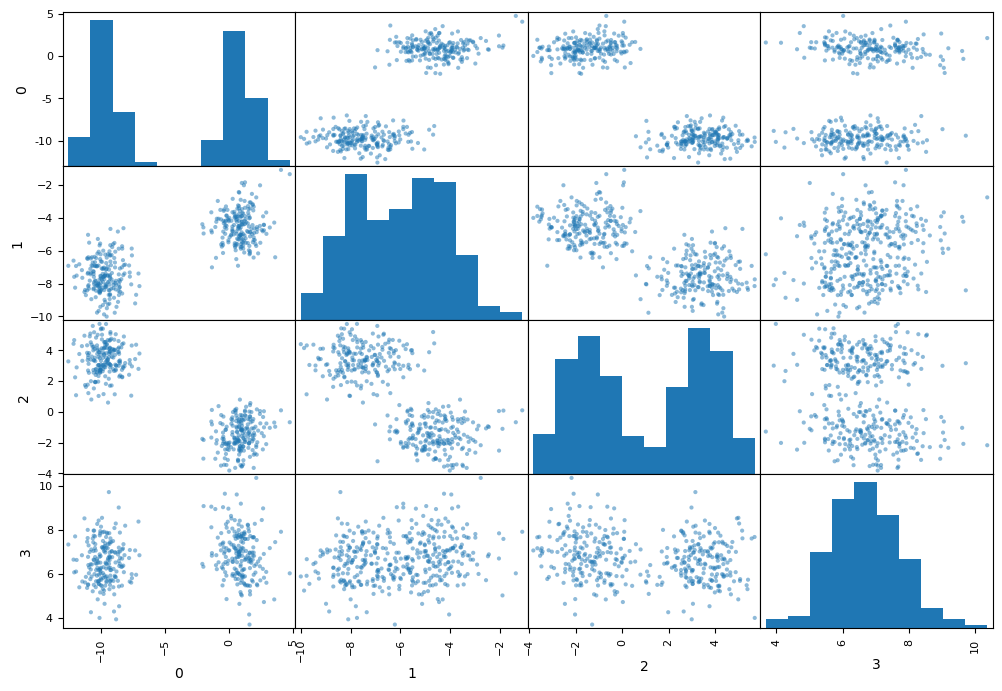

In [496]:
DF = pd.DataFrame.from_records(X)
scatter_matrix(DF, figsize=(12,8))
plt.show()

In [497]:
DF.head(4)

,0,1,2,3
0,-0.066117,-5.495053,-2.139094,6.593238
1,-8.845132,-8.098267,2.994165,3.924006
2,-0.456479,-4.194228,-0.312987,6.430680
3,4.041489,-1.098409,0.093724,7.908419


We can view the linear separation that the data enjoys between features. Using feature 0 with any other feature is linearly seperable, showing that column 0 is a desirable feature we will note when implementing Perceptron. At the same time, feature 3 may not be a desirable feature to work with as it may not promote great resuls in terms of linear separation. In any case, the Perceptron algorithm will be able to find this linear seperation by itself though it may not be a global solution. 

a. [20 pts] Finish perceptron_fit() code in the lecture notebook.

In [500]:
#general step function for binary models
def step(x):
     if (x > 0): 
        return 1 
     else: 
        return 0

accr_rates=[]
def perceptron_fit(w, X, Y, epochs):
    
    for i in range(0,epochs): 
        # X,Y = shuffle(X,Y)
        indices = np.arange(len(Y))
        np.random.shuffle(indices)
        X = X[indices]
        Y = Y[indices]

        misclass_rate=0
        epochs_list.append(i)
        for j in range(0, len(Y)):
            ## calculate h ~ step function
            h = step(X[j].dot(w.T))
            if (h != Y[j]): #incorrectly classified
                misclass_rate=misclass_rate+1
                ## calculate error 
                e = X[j] if Y[j]== 0 else -X[j]      
                w = w-e
            

        accr = ((len(Y)-misclass_rate)/len(Y))
        misclass_rates.append(misclass_rate)
        accr_rates.append(accr)
        if(i % 25 == 0 or i == epochs -1):
            print("Accuracy score at iteration " + str(i) + ": " + str(accr))
            
    plt.plot(accr_rates)
    plt.title("Accuracy increase by iteration")
    plt.show()
    return w


Accuracy score at iteration 0: 0.47
Accuracy score at iteration 25: 0.985
Accuracy score at iteration 50: 0.995
Accuracy score at iteration 75: 0.9975
Accuracy score at iteration 99: 1.0


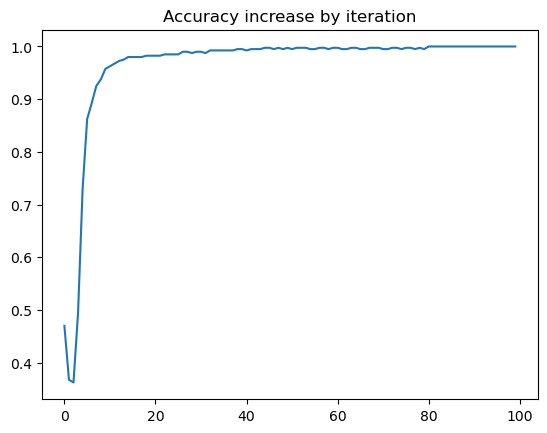

Obtained weights: [-0.82295326  0.43282903 -0.34880554 -0.1172248 ]


In [501]:
w = np.array([11, -100,-5000, 5000]) #starting with arbitrary weight vector
epochs=100

w = perceptron_fit(w, X, y, epochs)
w = unit_vector(w)
print("Obtained weights: " + str(w))

Above, we can see the weight vector for the Perceptron algorithm as [-0.82357545  0.43274354 -0.34726369 -0.1177473 ]. 

c. [5 pts] Run scikit-learn Perceptron to classify the target and compare the w vector with the
 obtained in b). Did you expect them to be the same? Explain why or why not.

Notably, we have found a solution which has an accuracy of 46.5% after the first iteration, with fast accuracy improvements right off the bat. By around the 5th-10th iteration, we reached over 90% successful classification. From here, the model shows steady improvements, as by halfway through we have an accuracy score of 99.75%. By the end of the model (the 100th iteration) we have attained the weights which draw the hyperplane providing for 100% of classification accuracy.

In [ ]:
from sklearn.linear_model import Perceptron

perc = Perceptron()
perc.fit(X,y)
y_perc = perc.predict(X)
print("Accuracy score: " + str(accuracy_score(y,y_perc)))
print("Obtained weights: " + str(unit_vector(perc.coef_)))

Accuracy score: 1.0
Obtained weights: [[-0.83612667 -0.00914202  0.40847152 -0.36600496]]


I did not expect these two weights, [-0.82357545  0.43274354 -0.34726369 -0.1177473 ] as from my Perceptron algorithm and [-0.83612667 -0.00914202  0.40847152 -0.36600496] from Scikit-learns Perceptron to be as close as they are to each other and thus I did not expect these two vectors to be the same, as the Perceptron algorithm that I implemented is capable of finding only one of the very many weights that are possible when searching for a hyperplane that linearly seperates our points. I understand that my model may have the capacity to find many of these local solutions, but it is also true that once our model finds any solution giving 100% classiciation accuracy will be the finally obtained weights. Thus, I understood that my algorithm would come across one of the hyperplanes in this 4-dimensional space that the Scikit-learn would have a very very low likelihood of being the same as. However, it is nice to note the close similarity in these two vectors, as it confirms for both that many hyperplanes fit through the identified region and leading to total accuracy.